### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:- 
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Read the data and answer the following questions to predict employee compensation

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/u

In [ ]:
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 22.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=31fca6c4261976b284f02e1c09028689623916985498b8886c29bc2cdcbac1e1
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.3.1-bin-hadoop3'

In [ ]:
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark import SparkFiles

spark = SparkSession \
       .builder \
       .appName("Our Second Spark example") \
       .getOrCreate()

spark

## 1. Read the Data

In [ ]:
spark=SparkSession.builder.getOrCreate()
## ensure to use the link of the raw file of the csv
url = "https://raw.githubusercontent.com/Munasib14/SparkSql_Employees_data/master/Employee_Compensation.csv" # Make sure the url is the raw version of 

In [ ]:
spark.sparkContext.addFile(url)

In [ ]:
# Reading the downloaded content and turning it into a pandas dataframe

rawDF = spark.read.csv(SparkFiles.get("Employee_Compensation.csv"),inferSchema=True, header= True)
rawDF.show()

+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+---

### 1.1 Display the number of rows and columns in the dataset

In [ ]:
print("Number of Rows: ", rawDF.count())
print("Number of Columns", len(rawDF.columns))

Number of Rows:  291825
Number of Columns 22


### 1.2 Check the datatype of the variables

In [ ]:
rawDF.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [ ]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col

# Converting Inter type data columns to Double type data columns

refinedDF= rawDF.withColumn('Year',col('Year').cast(DoubleType()))
refinedDF= refinedDF.withColumn('Organization Group Code',col('Organization Group Code').cast(DoubleType()))
refinedDF= refinedDF.withColumn('Union Code',col('Union Code').cast(DoubleType()))
refinedDF= refinedDF.withColumn('Employee Identifier',col('Employee Identifier').cast(DoubleType()))

refinedDF.printSchema()


root
 |-- Year Type: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Organization Group Code: double (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: double (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: double (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [ ]:
refinedDF.describe().toPandas()

,summary,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,count,291825,291825,291825,291825,291825,291825,291782,291782,291780,...,291825,291825,291825,291825,291825,291825,291825,291825,291825,291825
1,mean,None,2014.325061252463,2.9770513150004283,None,None,None,489.5060764543392,None,4778.5595401977025,...,26917.83031611411,63210.17288680958,4406.877439766992,3781.032869870591,71398.08319644183,12937.728957114685,8921.893731721031,4644.2764069562145,26503.899095793855,97901.98229222857
2,stddev,None,1.0322652725499475,1.5777709265315083,None,None,None,333.7611361507317,None,3090.28317174425,...,15548.201986568694,44660.46230493864,11079.405928192673,7697.665317297405,52224.214098750745,9785.06480840167,4900.318082757292,3787.9070104212783,16800.143146558938,67777.54915227571
3,min,Calendar,2013.0,1.0,Community Health,AAM,Academy of Sciences,1.0,"Automotive Machinists, Local 1414",0900,...,1.0,-68771.78,-12308.66,-19131.1,-68771.78,-30621.43,-2940.47,-10636.5,-21295.15,-74082.61
4,max,Fiscal,2016.0,7.0,"Public Works, Transportation & Commerce",WTR,War Memorial,990.0,"Transportation Workers, Local 200",SFRA,...,53794.0,515101.8,227313.62,342802.63,515101.8,105052.98,21872.8,35157.63,141043.64,653498.15


In [ ]:
refinedDF.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Year Type,291825,None,None,Calendar,Fiscal
Year,291825,2014.325061252463,1.0322652725499475,2013.0,2016.0
Organization Group Code,291825,2.9770513150004283,1.5777709265315083,1.0,7.0
Organization Group,291825,None,None,Community Health,"Public Works, Transportation & Commerce"
Department Code,291825,None,None,AAM,WTR
Department,291825,None,None,Academy of Sciences,War Memorial
Union Code,291782,489.5060764543392,333.7611361507317,1.0,990.0
Union,291782,None,None,"Automotive Machinists, Local 1414","Transportation Workers, Local 200"
Job Family Code,291780,4778.5595401977025,3090.28317174425,0900,SFRA


In [ ]:
import pyspark.sql.functions as func

for col_name in refinedDF.columns:
  # rawDF = rawDF.withColumn(col_name, when(rawDF[col_name] < 0, float("NaN")).otherwise(rawDF[col_name]))
  refinedDF = refinedDF.withColumn(col_name, F.when(refinedDF[col_name] < 0, None).otherwise(refinedDF[col_name]))

In [ ]:
refinedDF.describe().toPandas()

,summary,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,count,291825,291825,291825,291825,291825,291825,291782,291782,291780,...,291825,291746,291795,291763,291774,291403,291481,291146,291376,291579
1,mean,None,2014.325061252463,2.9770513150004283,None,None,None,489.5060764543392,None,4778.5595401977025,...,26917.83031611411,63228.037457011254,4407.392725372273,3782.059353996173,71411.11328192928,12958.483113900646,8932.547398833873,4656.192969953201,26546.06917920503,97985.41488186597
2,stddev,None,1.0322652725499475,1.5777709265315083,None,None,None,333.7611361507317,None,3090.28317174425,...,15548.201986568694,44653.11304184088,11079.836678802836,7698.059385581305,52219.321660205824,9775.357283416884,4893.374699008634,3783.539892869415,16778.311516930185,67745.05335010726
3,min,Calendar,2013.0,1.0,Community Health,AAM,Academy of Sciences,1.0,"Automotive Machinists, Local 1414",0900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,max,Fiscal,2016.0,7.0,"Public Works, Transportation & Commerce",WTR,War Memorial,990.0,"Transportation Workers, Local 200",SFRA,...,53794.0,515101.8,227313.62,342802.63,515101.8,105052.98,21872.8,35157.63,141043.64,653498.15


In [ ]:
dropping_columns = ['Year','Organization Group','Department','Union',
                   'Job Family Code','Job Family','Job','Employee Identifier','Total Salary']

#dropping the columns
for i in dropping_columns:
  refinedDF = refinedDF.drop(i)

### 4. Perform Missing Value Analysis

In [ ]:
from pyspark.sql.functions import isnull, when, count, col
refinedDF.select([count(when(isnull(c), c)).alias(c) for c in refinedDF.columns]).show()

+---------+-----------------------+---------------+----------+--------+--------+--------+--------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Organization Group Code|Department Code|Union Code|Job Code|Salaries|Overtime|Other Salaries|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+-----------------------+---------------+----------+--------+--------+--------+--------------+----------+-------------+--------------+--------------+------------------+
|        0|                      0|              0|        43|       0|      79|      30|            62|       422|          344|           679|           449|               246|
+---------+-----------------------+---------------+----------+--------+--------+--------+--------------+----------+-------------+--------------+--------------+------------------+



### 5. Exploratory Data Analysis

In [ ]:
refinedDF = refinedDF.na.drop()

In [ ]:
refinedDF.describe().toPandas()

,summary,Year Type,Organization Group Code,Department Code,Union Code,Job Code,Salaries,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,count,290348,290348,290348,290348,290348,290348,290348,290348,290348,290348,290348,290348,290348
1,mean,None,2.974516786752449,None,488.6780862964443,4914.051834392377,63464.28794688854,4428.9518982738045,3776.793112058584,12992.41081133671,8962.368719741471,4665.159130526113,26619.938661606207,98289.97161881471
2,stddev,None,1.578720129529133,None,333.81800306485326,3128.6994352092333,44584.810580813595,11103.097103077793,7620.245695416703,9767.174924191759,4875.482131943269,3782.560198233237,16750.737751121855,67671.28008713707
3,min,Calendar,1.0,AAM,1.0,0109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,max,Fiscal,7.0,WTR,990.0,Q082,515101.8,227313.62,342802.63,105052.98,21872.8,35157.63,141043.64,653498.15


In [ ]:
from pyspark.sql.functions import isnull, when, count, col
refinedDF.select([count(when(isnull(c), c)).alias(c) for c in refinedDF.columns]).show()

+---------+-----------------------+---------------+----------+--------+--------+--------+--------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Organization Group Code|Department Code|Union Code|Job Code|Salaries|Overtime|Other Salaries|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+-----------------------+---------------+----------+--------+--------+--------+--------------+----------+-------------+--------------+--------------+------------------+
|        0|                      0|              0|         0|       0|       0|       0|             0|         0|            0|             0|             0|                 0|
+---------+-----------------------+---------------+----------+--------+--------+--------+--------------+----------+-------------+--------------+--------------+------------------+



#### 5.1. Find top compensating organizations. Display using bar plot

In [ ]:
import pyspark.sql.functions as F
from pyspark.sql.functions import desc

org_df = rawDF.groupby('Organization Group').max().select(['Organization Group', 'max(Total Compensation)']).orderBy(desc("max(Total Compensation)"))

org_df.show()

+--------------------+-----------------------+
|  Organization Group|max(Total Compensation)|
+--------------------+-----------------------+
|General Administr...|              653498.15|
|   Public Protection|              510574.44|
|Public Works, Tra...|              430872.68|
|    Community Health|              422799.94|
|Human Welfare & N...|               372586.3|
|Culture & Recreation|              318713.18|
|General City Resp...|              137930.88|
+--------------------+-----------------------+



<BarContainer object of 7 artists>

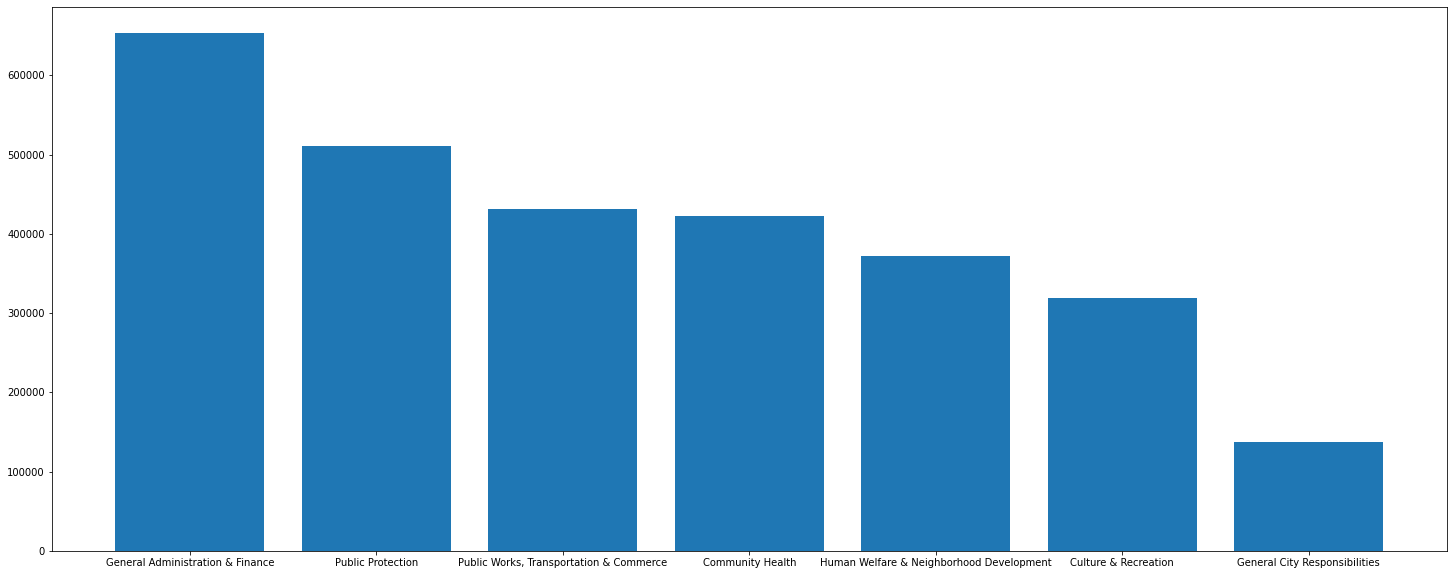

In [ ]:
fig = plt.figure(figsize =(25, 10))

org_df=org_df.toPandas()
plt.bar(org_df["Organization Group"], org_df["max(Total Compensation)"])

#### 5.2. Find top Compensating Jobs. Display using bar plot

In [ ]:
job_df = rawDF.groupby('Job').max().select(['Job', 'max(Total Compensation)']).orderBy(desc("max(Total Compensation)"))

job_df.show()

+--------------------+-----------------------+
|                 Job|max(Total Compensation)|
+--------------------+-----------------------+
|Chief Investment ...|              653498.15|
|      Deputy Chief 3|              510574.44|
|   Asst Med Examiner|               497505.0|
|     Chief Of Police|              466798.21|
|         Dept Head V|              433302.72|
|Chief, Fire Depar...|              426006.85|
|Battlion Chief, F...|              425605.01|
|Adm, SFGH Medical...|              422799.94|
|Executive Contrac...|              422019.78|
|Senior Physician ...|              418013.58|
|Gen Mgr, Public T...|              410459.56|
|Asst Chf Of Dept ...|              406063.04|
|Dep Dir For Inves...|              403743.76|
|      Deputy Sheriff|              402204.51|
|Administrator, De...|              395626.45|
|Supervising Physi...|              390385.45|
|               Mayor|              382624.61|
|Lieutenant, Fire ...|              376938.29|
|Dep Chf Of D

<BarContainer object of 10 artists>

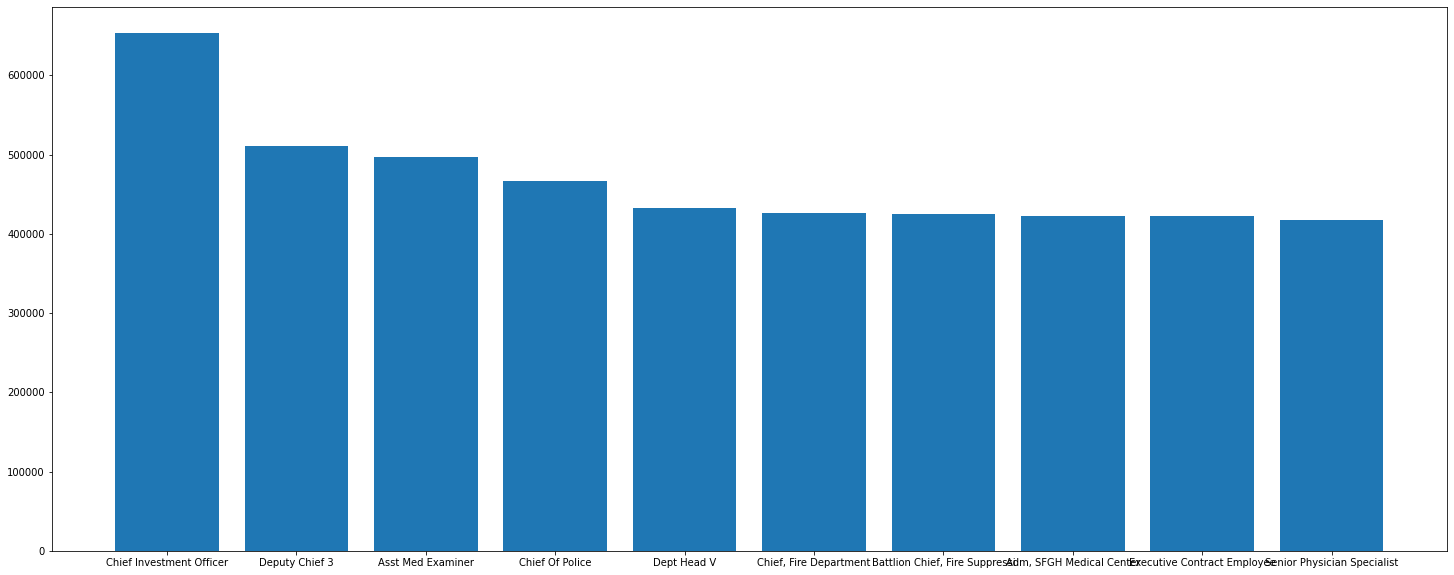

In [ ]:
fig = plt.figure(figsize =(25, 10))

#job_df = job_df.toPandas().head(10)
#job_df = df.groupby('Job').max().select(['Job', 'max(Total Compensation)']).orderBy(desc("max(Total Compensation)"))
jobDF = rawDF[['Job','Total Compensation']].groupby('Job').max('Total Compensation').sort(desc("max(Total Compensation)")).toPandas().head(10)
plt.bar(jobDF["Job"], jobDF["max(Total Compensation)"])

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

In [ ]:
# Finding numerical columns/features for corelation analysis and to plot HeatMap

numeric_features = [t[0] for t in refinedDF.dtypes if t[1] !='string']
numeric_features_df = rawDF.select(numeric_features)
#numeric_features_df.toPandas()
numeric_features_df.show()
len(numeric_features_df.columns)

+-----------------------+----------+---------+--------+--------------+----------+-------------+--------------+--------------+------------------+
|Organization Group Code|Union Code| Salaries|Overtime|Other Salaries|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+-----------------------+----------+---------+--------+--------------+----------+-------------+--------------+--------------+------------------+
|                      1|       311|114473.16|     0.0|        1500.0|  21025.98|      13068.8|       9368.71|      43463.49|         159436.65|
|                      5|       790| 84077.11|     0.0|           0.0|   16587.3|     12457.73|       6931.91|      35976.94|         120054.05|
|                      4|       535|  9980.17|     0.0|        798.43|       0.0|      2254.93|        835.11|       3090.04|          13868.64|
|                      4|       250|  2873.41|     0.0|           0.0|       0.0|       622.63|        222.46|        845.09|     

10

In [ ]:
col_names = numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])

In [ ]:
from pyspark.mllib.stat import Statistics
import pandas as pd

corr_mat = Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index = col_names
corr_df.columns = col_names
round(corr_df, 2)

,Organization Group Code,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Organization Group Code,1.00,NaN,-0.22,-0.30,-0.23,-0.25,-0.23,0.03,-0.21,-0.27
Union Code,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salaries,-0.22,NaN,1.00,0.27,0.32,0.95,0.77,0.70,0.94,0.97
Overtime,-0.30,NaN,0.27,1.00,0.35,0.31,0.31,0.06,0.29,0.45
Other Salaries,-0.23,NaN,0.32,0.35,1.00,0.34,0.21,0.04,0.27,0.45
Retirement,-0.25,NaN,0.95,0.31,0.34,1.00,0.79,0.67,0.97,0.96
Health/Dental,-0.23,NaN,0.77,0.31,0.21,0.79,1.00,0.60,0.89,0.81
Other Benefits,0.03,NaN,0.70,0.06,0.04,0.67,0.60,1.00,0.79,0.67
Total Benefits,-0.21,NaN,0.94,0.29,0.27,0.97,0.89,0.79,1.00,0.94
Total Compensation,-0.27,NaN,0.97,0.45,0.45,0.96,0.81,0.67,0.94,1.00


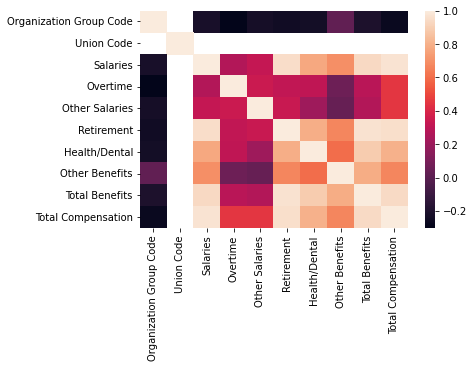

In [ ]:
sns.heatmap(corr_df)

### 6 Categorise the attributes into its type (Use one hot encoding wherever required)

In [ ]:
catcols = []
numcols = []
targetcol = ['Total Compensation']

for col_name in refinedDF.dtypes:
    if (col_name[0] not in targetcol):
        if col_name[1] == 'string':
            catcols.append(col_name[0])
        else:
            numcols.append(col_name[0])

In [ ]:
if(len(refinedDF.columns) == len(targetcol) + len(numcols) + len(catcols)):
    print("The number of variables is equal to each other.")
else: print("There is a problem with variable grouping!")

The number of variables is equal to each other.


In [ ]:
for cat_col in catcols:
    print(cat_col)
    refinedDF.groupBy(cat_col).count().orderBy(F.desc("count")).show()

Year Type
+---------+------+
|Year Type| count|
+---------+------+
|   Fiscal|166687|
| Calendar|123661|
+---------+------+

Department Code
+---------------+-----+
|Department Code|count|
+---------------+-----+
|            DPH|62640|
|            MTA|42475|
|            DSS|23993|
|            POL|22953|
|            REC|16220|
|            AIR|13665|
|            FIR|11742|
|            DPW|11083|
|            SHF| 7551|
|            ADM| 7354|
|            PUC| 6806|
|            LIB| 6658|
|            WTR| 5902|
|            CWP| 4210|
|            CRT| 3994|
|            HHP| 2977|
|            JUV| 2388|
|            CAT| 2368|
|            DBI| 2278|
|            DAT| 2163|
+---------------+-----+
only showing top 20 rows

Job Code
+--------+-----+
|Job Code|count|
+--------+-----+
|    9163|17964|
|    P103| 9856|
|    2320| 8925|
|    9916| 6416|
|    Q004| 5810|
|    H002| 5772|
|    2708| 5728|
|    9910| 5028|
|    3279| 4988|
|    Q002| 4862|
|    2303| 4480|
|    8304|

In [ ]:
# String indexing the categorical columns

from pyspark.ml.feature import StringIndexer, OneHotEncoder

#String_indexers = StringIndexer(inputCols= catcols, 
#                         outputCols=['YearType_strindexed','DepartmentCode_strindexed','JobCode_strindexed'])

String_indexers = StringIndexer(inputCols= catcols, 
                        outputCols=[x+"_strIndexed" for x in catcols])

stringindexedDF = String_indexers.fit(refinedDF).transform(refinedDF)

stringindexedDF.show()

+---------+-----------------------+---------------+----------+--------+---------+--------+--------------+----------+-------------+--------------+--------------+------------------+--------------------+--------------------------+-------------------+
|Year Type|Organization Group Code|Department Code|Union Code|Job Code| Salaries|Overtime|Other Salaries|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Year Type_strIndexed|Department Code_strIndexed|Job Code_strIndexed|
+---------+-----------------------+---------------+----------+--------+---------+--------+--------------+----------+-------------+--------------+--------------+------------------+--------------------+--------------------------+-------------------+
|   Fiscal|                    1.0|            DAT|     311.0|    8177|114473.16|     0.0|        1500.0|  21025.98|      13068.8|       9368.71|      43463.49|         159436.65|                 0.0|                      19.0|               14.0|
| Calend

In [ ]:
# Drop unnecessary columns

for x in catcols:
    stringindexedDF = stringindexedDF.drop(x)
    
stringindexedDF.show()

+-----------------------+----------+---------+--------+--------------+----------+-------------+--------------+--------------+------------------+--------------------+--------------------------+-------------------+
|Organization Group Code|Union Code| Salaries|Overtime|Other Salaries|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Year Type_strIndexed|Department Code_strIndexed|Job Code_strIndexed|
+-----------------------+----------+---------+--------+--------------+----------+-------------+--------------+--------------+------------------+--------------------+--------------------------+-------------------+
|                    1.0|     311.0|114473.16|     0.0|        1500.0|  21025.98|      13068.8|       9368.71|      43463.49|         159436.65|                 0.0|                      19.0|               14.0|
|                    5.0|     790.0| 84077.11|     0.0|           0.0|   16587.3|     12457.73|       6931.91|      35976.94|         120054.05|    

In [ ]:
encoder = OneHotEncoder(inputCols= [x+"_strIndexed" for x in catcols], 
                         outputCols=[x+"_OHEncoded" for x in catcols])
encodedDF = encoder.fit(stringindexedDF).transform(stringindexedDF)

encodedDF.show()

+-----------------------+----------+---------+--------+--------------+----------+-------------+--------------+--------------+------------------+--------------------+--------------------------+-------------------+-------------------+-------------------------+------------------+
|Organization Group Code|Union Code| Salaries|Overtime|Other Salaries|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Year Type_strIndexed|Department Code_strIndexed|Job Code_strIndexed|Year Type_OHEncoded|Department Code_OHEncoded|Job Code_OHEncoded|
+-----------------------+----------+---------+--------+--------------+----------+-------------+--------------+--------------+------------------+--------------------+--------------------------+-------------------+-------------------+-------------------------+------------------+
|                    1.0|     311.0|114473.16|     0.0|        1500.0|  21025.98|      13068.8|       9368.71|      43463.49|         159436.65|                 0.0| 

In [ ]:
# Drop unnecessary columns

for x in catcols:
    encodedDF = encodedDF.drop(x+"_strIndexed")
    
encodedDF.show()

+-----------------------+----------+---------+--------+--------------+----------+-------------+--------------+--------------+------------------+-------------------+-------------------------+------------------+
|Organization Group Code|Union Code| Salaries|Overtime|Other Salaries|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Year Type_OHEncoded|Department Code_OHEncoded|Job Code_OHEncoded|
+-----------------------+----------+---------+--------+--------------+----------+-------------+--------------+--------------+------------------+-------------------+-------------------------+------------------+
|                    1.0|     311.0|114473.16|     0.0|        1500.0|  21025.98|      13068.8|       9368.71|      43463.49|         159436.65|      (1,[0],[1.0])|          (53,[19],[1.0])| (1129,[14],[1.0])|
|                    5.0|     790.0| 84077.11|     0.0|           0.0|   16587.3|     12457.73|       6931.91|      35976.94|         120054.05|          (1,[],

In [ ]:
vectinDF = stringindexedDF.drop('Total Compensation')
inp_cols= vectinDF.columns

inp_cols

['Organization Group Code',
 'Union Code',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Retirement',
 'Health/Dental',
 'Other Benefits',
 'Total Benefits',
 'Year Type_strIndexed',
 'Department Code_strIndexed',
 'Job Code_strIndexed']

In [ ]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = inp_cols , outputCol = 'features')
assembledDF = vectorAssembler.transform(stringindexedDF)

assembledDF.select("features").show(5, False)

+--------------------------------------------------------------------------------+
|features                                                                        |
+--------------------------------------------------------------------------------+
|[1.0,311.0,114473.16,0.0,1500.0,21025.98,13068.8,9368.71,43463.49,0.0,19.0,14.0]|
|[5.0,790.0,84077.11,0.0,0.0,16587.3,12457.73,6931.91,35976.94,1.0,43.0,135.0]   |
|[4.0,535.0,9980.17,0.0,798.43,0.0,2254.93,835.11,3090.04,1.0,0.0,20.0]          |
|[4.0,250.0,2873.41,0.0,0.0,0.0,622.63,222.46,845.09,0.0,0.0,333.0]              |
|[5.0,790.0,6701.85,0.0,176.7,0.0,2711.66,538.43,3250.09,0.0,4.0,8.0]            |
+--------------------------------------------------------------------------------+
only showing top 5 rows



### 6.1 Split the data into train and test set

In [ ]:
# We spilt the data into 70-30 set
# Training Set - 70% obesevations
# Testing Set - 30% observations
train,test =  assembledDF.randomSplit([0.7,0.3], seed = 2020)

# print the count of observations in each set
print("Observations in training set = ", train.count())
print("Observations in testing set = ", test.count())

Observations in training set =  203282
Observations in testing set =  87066


### 7. Fit Linear Regression model on the data and check its performance

In [ ]:
from pyspark.ml.regression import LinearRegression

lnr = LinearRegression(featuresCol = 'features', labelCol='Total Compensation', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrmodel = lnr.fit(train)
print("Coefficients: " + str(lrmodel.coefficients))
print("Intercept: " + str(lrmodel.intercept))

Coefficients: [162.4857501892879,0.7014816807753479,0.8110013180645717,0.979476911691317,0.9296198751744864,1.4168017136959603,-0.01826905645996941,0.34283209417176413,0.6809396060165234,-342.5179453428342,-0.0,0.8510906251188712]
Intercept: 228.73249512888364


In [ ]:
predictionDF = lrmodel.transform(test)

predictionDF.select("prediction","Total Compensation","features").show()

+------------------+------------------+--------------------+
|        prediction|Total Compensation|            features|
+------------------+------------------+--------------------+
|1382.8282732870248|            782.17|[1.0,1.0,330.35,0...|
|3161.4779462046918|           1821.55|[1.0,1.0,397.0,0....|
| 1471.831725963118|            883.79|[1.0,1.0,401.0,0....|
|1939.6445817349238|           1277.46|[1.0,1.0,413.0,0....|
|1241.4357355238408|            583.08|[1.0,1.0,413.0,0....|
| 1143.568983453349|            917.51|[1.0,1.0,496.25,0...|
|  1490.03868755891|            921.37|[1.0,1.0,496.25,0...|
| 1442.683339798634|            806.51|[1.0,1.0,586.3,0....|
| 1765.848425719934|           1133.41|[1.0,1.0,839.4,0....|
| 9768.199783336158|           6043.47|[1.0,1.0,1297.25,...|
| 2683.068839296689|           2548.48|[1.0,1.0,1458.9,0...|
| 66462.14508297818|          67344.95|[1.0,1.0,47176.8,...|
| 89879.62594239633|          91769.19|[1.0,1.0,61991.82...|
| 92957.29962516094|    

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total Compensation",metricName="r2")
r2=lr_evaluator.evaluate(predictionDF)
print("R Squared (R2) on test data = %g" % r2)

R Squared (R2) on test data = 0.997984


### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [ ]:
# from pyspark.ml.regression import DecisionTreeRegressor
# dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Total Compensation', impurity='gini', maxDepth=5, maxBins=32)
# dt_model = dt.fit(train)

# print("Coefficients: " + str(dt_model.coefficients))
# print("Intercept: " + str(dt_model.intercept))

In [ ]:
# from pyspark.ml.regression import DecisionTreeRegressor
# dt_model = DecisionTreeRegressor().fit(train)

### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [ ]:
# # use save() method to save the model
# # write().overwrite() is usually used when you want to replace the older model with a new one
# # It might happen that you wish to retrain your model and save it at the same the place
# lrmodel.write().overwrite().save("/FileStore/models/lrmodel")

##### Loading the model

In [ ]:
# # import PipelineModel from pyspark.ml package
# from pyspark.ml import PipelineModel

# # load the model from the location it is stored
# # The loaded model acts as PipelineModel
# pipemodel = PipelineModel.load("/FileStore/models/lrmodel")

# # use the PipelineModel object to perform prediciton on test data. 
# # Use .transform() to perfrom prediction
# prediction = pipemodel.transform(testDF)

# # print the results
# prediction.select('label', 'rawPrediction', 'probability', 'prediction').show(5)